# LLM

**모델 파라미터에 따른 LLM구분**

LLM(대규모 언어 모델)은 주로 모델 파라미터(매개변수, parameters)의 개수에 따라 모델의 크기와 성능이 구분된다. 파라미터 수가 많을수록 일반적으로 더 복잡하고 다양한 언어 패턴을 학습할 수 있으며, 성능도 향상되는 경향이 있다.

* **LLM**: 175B \~ nT
* **SLM**: 6,7B ~ 30B
  * 파인튜닝후 일반화 성능이 떨어지는 경우가 많다.
  * 특히 10B 밑의 모델들이 더 그렇다*
* **On-device AI**: 1~2B

**open/close-source 여부에 따른 LLM구분**

LLM은 공개 범위와 활용 방식에 따라 크게 **개방형(Open Source, 오픈소스)**과 **폐쇄형(Closed Source, 독점/상용)**으로 구분할 수 있다.

| 구분      | 개방형(Open Source) LLM              | 폐쇄형(Closed Source) LLM                 |
|-----------|--------------------------------------|-------------------------------------------|
| 라이선스   | 오픈소스 라이선스(예: Apache, MIT)    | 벤더(기업) 라이선스, 상용, API 기반         |
| 모델 접근 | 소스 코드, 가중치, 아키텍처 모두 공개 | 내부 구조/가중치 비공개, API로만 접근        |
| 커스터마이징 | 자유롭게 수정·파인튜닝 가능           | 제한적, 벤더가 허용하는 범위 내에서만 가능   |
| 기술 지원 | 커뮤니티 중심, 자발적 기여            | 벤더의 공식 지원, SLA 제공                  |
| 보안/프라이버시 | 자체 서버 배포 가능, 유연한 보안 적용  | 벤더 인프라 의존, 데이터 외부 전송 필요       |
| 비용 구조  | 인프라 직접 부담, 무료 활용 가능       | API 호출별 과금, 구독 등 상용 모델           |
| 대표 예시  | Meta LLaMA, Mistral, GPT-NeoX 등     | OpenAI GPT-3/4, Google Gemini, Anthropic Claude 등 |

- **개방형 LLM**은 연구자와 개발자가 자유롭게 모델을 활용·수정할 수 있어 빠른 혁신과 다양한 커스터마이징이 가능하다. 단, 자체 운영·관리 역량이 필요하다.
- **폐쇄형 LLM**은 벤더가 모델을 소유·운영하며, 사용자는 API 형태로 접근한다. 보안, 신뢰성, 공식 지원이 강점이나, 내부 구조나 가중치 접근이 제한된다.

## LLM Vendor별 테스트

1. **번역** :

   ```text
   The dominant sequence transduction models are based on complex recurrent or
   convolutional neural networks that include an encoder and a decoder. The best
   performing models also connect the encoder and decoder through an attention
   mechanism. We propose a new simple network architecture, the Transformer,
   based solely on attention mechanisms, dispensing with recurrence and convolutions
   entirely. Experiments on two machine translation tasks show these models to
   be superior in quality while being more parallelizable and requiring significantly
   less time to train. Our model achieves 28.4 BLEU on the WMT 2014 Englishto-German translation task, improving over the existing best results, including
   ensembles, by over 2 BLEU. On the WMT 2014 English-to-French translation task,
   our model establishes a new single-model state-of-the-art BLEU score of 41.8 after
   training for 3.5 days on eight GPUs, a small fraction of the training costs of the
   best models from the literature. We show that the Transformer generalizes well to
   other tasks by applying it successfully to English constituency parsing both with
   large and limited training data.

   영어로 작성된 과학 저널 논문 초록을 한국어로 번역하되, 전문 용어(예: “photovoltaic efficiency”, “bandgap engineering”)를 정확하게 반영하고, 논문 특유의 딱딱한 문체를 유지하라.
   ```
   - [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385)
   - [Attention Is All You Need](https://arxiv.org/pdf/1706.03762)

2. **코드 생성 (난이도 중상)**

   ```text
   최근 비트코인 가격데이터를 가져와서 시각화 하는 코드를 작성해줘.
   - 설치가 필요한 라이브러리가 있는 경우, 설치코드 역시 작성할 것!
   ```

3. **창의적 글짓기**

   ```text
   “인간과 로봇이 공존하는 미래 도시”를 배경으로,
   200자 내외의 짧은 SF 단편을 한 편 써줘.
   ```

4. **요약**

   ```text
   아래 기술 블로그 글을 3문장 이내로 간결하게 요약해줘:
   “머신러닝 모델의 과적합(overfitting) 문제를 해결하기 위해 정규화(regularization) 기법이 어떻게 사용되는지, L1/L2 페널티의 차이와 장단점을 사례를 들어 설명한다.”
   ```
5. **환각**

   ```text
   현재 대한민국 대통령이 누구야?
   강남에 유명한 성형외과 의사 오지명에 대해 알려줘
   ```
   - knowledge cutoff 이후 이벤트에 대한 질문

### OpenAI ChatGPT

### Google Deepmind Gemini

/tmp/ipython-input-5-3851943108.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


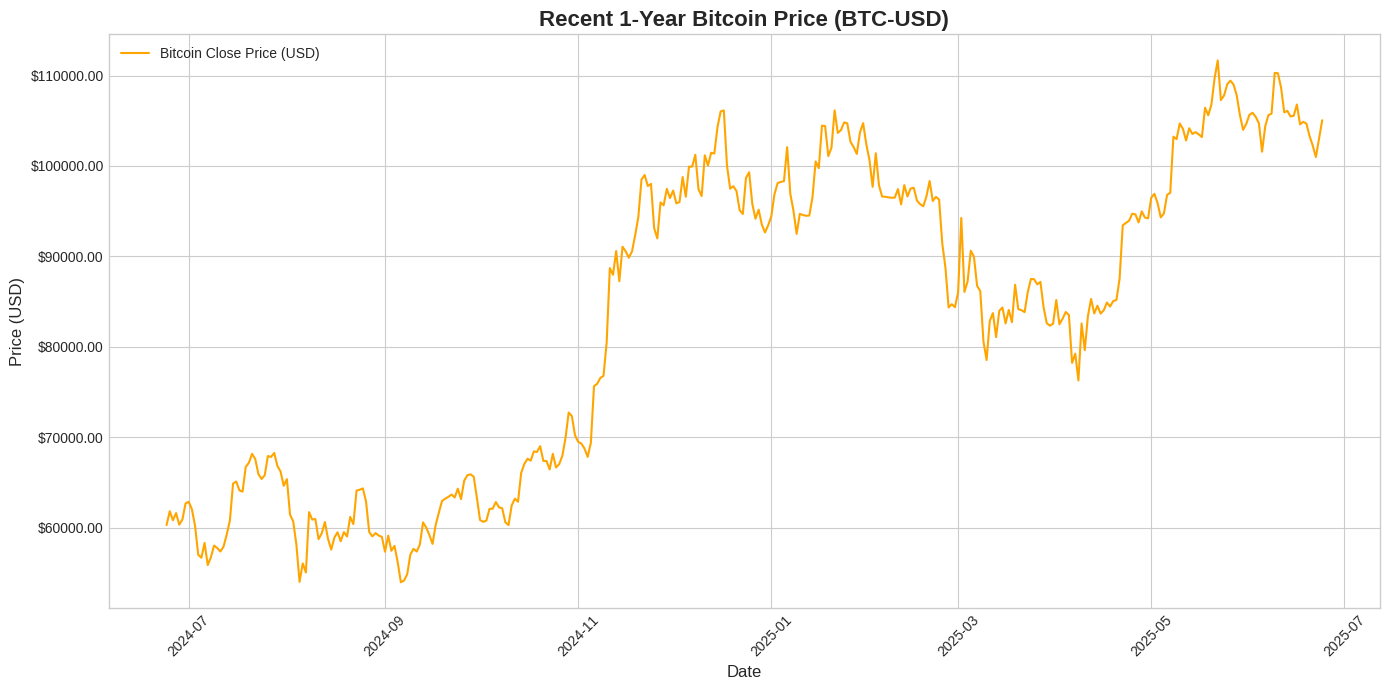

In [5]:
# 1. 라이브러리 설치 (터미널 또는 명령 프롬프트에서 실행)
!pip install yfinance matplotlib pandas

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from datetime import datetime, timedelta

# 2. 데이터 가져오기
# 비트코인 Ticker 설정 (BTC-USD)
ticker = "BTC-USD"

# 최근 1년간의 데이터 가져오기
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

try:
    # yfinance를 사용하여 데이터 다운로드
    btc_data = yf.download(ticker, start=start_date, end=end_date)

    if btc_data.empty:
        print("데이터를 가져오지 못했습니다. Ticker 심볼('BTC-USD')이 올바른지 확인해주세요.")
    else:
        # 3. 데이터 시각화
        plt.style.use('seaborn-v0_8-whitegrid') # 스타일 설정
        fig, ax = plt.subplots(figsize=(14, 7))

        # 종가(Close)를 선 그래프로 플롯
        ax.plot(btc_data.index, btc_data['Close'], label='Bitcoin Close Price (USD)', color='orange')

        # 그래프 제목 및 레이블 설정
        ax.set_title('Recent 1-Year Bitcoin Price (BTC-USD)', fontsize=16, fontweight='bold')
        ax.set_xlabel('Date', fontsize=12)
        ax.set_ylabel('Price (USD)', fontsize=12)

        # Y축 포맷 설정 (달러 표시 및 콤마)
        formatter = mticker.FormatStrFormatter('$%1.2f')
        ax.yaxis.set_major_formatter(formatter)

        # X축 날짜 포맷 설정
        plt.xticks(rotation=45)

        # 범례 및 그리드 표시
        ax.legend()
        ax.grid(True)

        # 레이아웃 최적화
        plt.tight_layout()

        # 그래프 보여주기
        plt.show()

except Exception as e:
    print(f"오류가 발생했습니다: {e}")

## Anthropic Claude

https://claude.ai/

## Naver HyperClova X

https://clova-x.naver.com/



In [8]:
!pip install pandas numpy matplotlib requests beautifulsoup4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# URL 설정
url = 'https://www.investing.com/crypto/bitcoin/historical-data?currency=USD&period=Daily'

# HTML 요청 및 파싱
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# 테이블 데이터 추출
table = soup.find('table', {'id': 'historical_data'})


tables = soup.find_all('table')
if tables:
    table = tables[0]  # 첫 번째 테이블 선택
    rows = table.find_all('tr')[1:]
rows = table.find_all('tr')[1:]  # 첫 번째 행은 헤더이므로 제외

# 데이터 리스트로 변환
data = []
for row in rows:
    columns = row.find_all('td')
    date = columns[0].text.strip()
    price = float(columns[1].text.strip().replace(',', ''))  # 천 단위 쉼표 제거
    data.append([date, price])

# 데이터프레임 생성
df = pd.DataFrame(data, columns=['Date', 'Price'])

# 날짜 형식 변환
df['Date'] = pd.to_datetime(df['Date'])

# 플롯 그리기
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Price'])
plt.title('Bitcoin Price Over Last Few Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


AttributeError: 'NoneType' object has no attribute 'find_all'

## LLM 평가

- 사람이 직접 평가 https://lmarena.ai/